## 피쳐 생성 (Feature Creation)
- 기존 데이터를 변형하거나 결합하여 모델의 성능을 향상시킬 수 있는 새로운 특성을 생성하는 과정
  - 두 개 이상의 피쳐를 합치거나 곱하여 새로운 피쳐를 생성한다.
  - 기존에 있는 피쳐의 형상을 바꾸어 새로운 피쳐를 생성한다.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'

In [3]:
df = pd.read_csv('./dataset/featurecreation.csv')

df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#### 날짜 데이터로부터 피쳐 생성

In [4]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S')

df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [5]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['weekday'] = df['datetime'].dt.weekday

df.drop('datetime', axis=1, inplace=True)

df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


#### 주중/주말별 자전거 대여량

In [6]:
df['workingday'].value_counts()

workingday
1    7412
0    3474
Name: count, dtype: int64

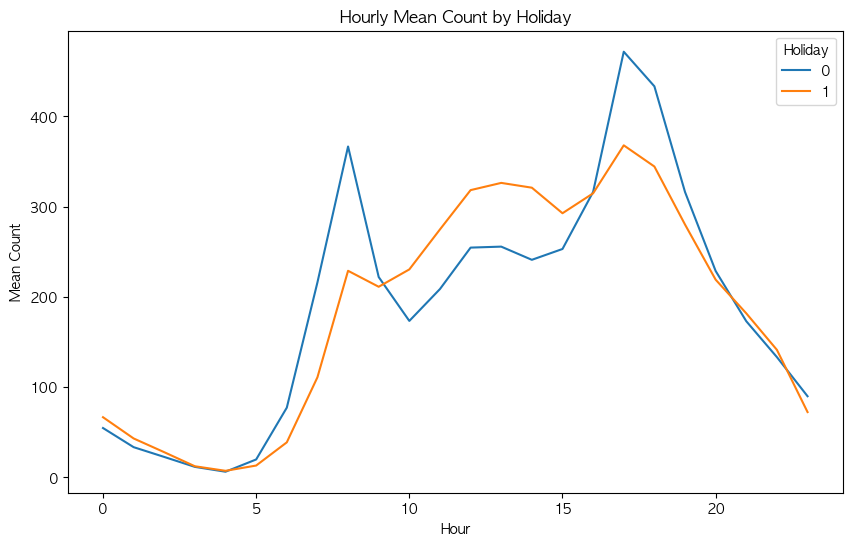

In [7]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='hour', y='count', hue='holiday', errorbar=None)
plt.title('Hourly Mean Count by Holiday')
plt.xlabel('Hour')
plt.ylabel('Mean Count')
plt.legend(title='Holiday')
plt.show()

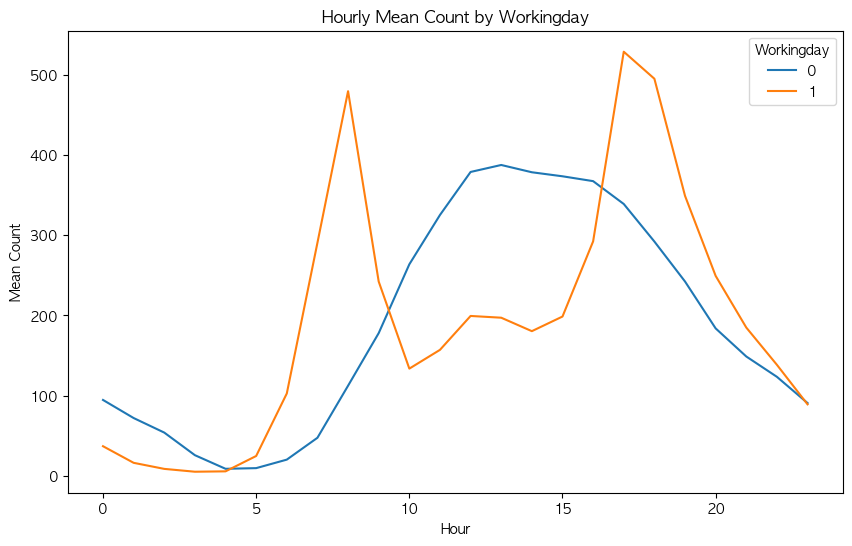

In [8]:
## working day -> 0~4 (월~금)
## no working day -> 5,6 (토,일)

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='hour', y='count', hue='workingday', errorbar = None)
plt.title('Hourly Mean Count by Workingday')
plt.xlabel('Hour')
plt.ylabel('Mean Count')
plt.legend(title='Workingday')
plt.show()


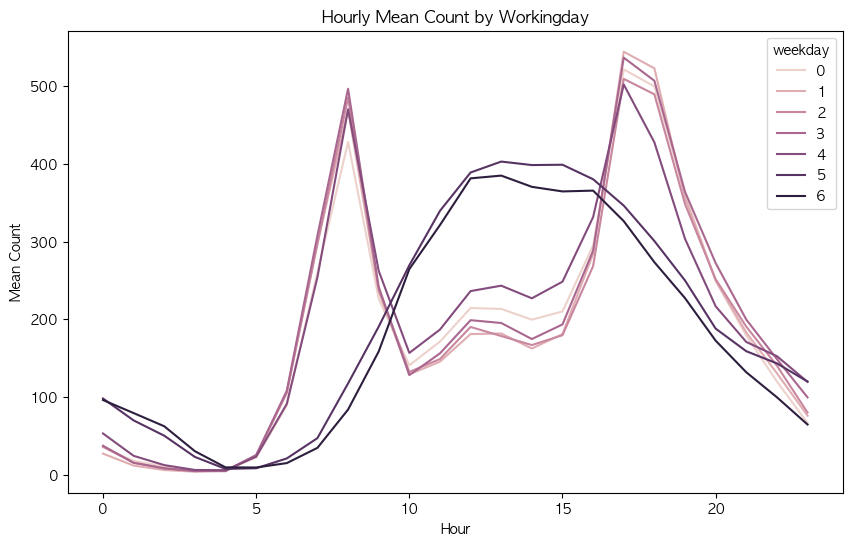

In [9]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='hour', y='count', hue='weekday', errorbar = None)
plt.title('Hourly Mean Count by Workingday')
plt.xlabel('Hour')
plt.ylabel('Mean Count')
plt.legend(title='weekday')
plt.show()

In [17]:
## holiday = 1 / workingday = 0 이면 0 부여

df[(df.holiday == 1) & (df.workingday == 0)].index.tolist()

KeyError: "None of [Index([  372,   373,   374,   375,   376,   377,   378,   379,   380,   381,\n       ...\n       10252, 10253, 10254, 10255, 10256, 10257, 10258, 10259, 10260, 10261],\n      dtype='int64', length=311)] are in the [columns]"

In [ ]:
## 주말과 주중에 따라 패턴 차이가 뚜렷하므로 주중/주말에 대한 변수를 추가해줄 수 있다.

df['daytype'] = 0
train_df.loc[train_df['day_of_week'] == 4, 'daytype'] = 1  # 금요일
train_df.loc[train_df['workingday'] == 0, 'daytype'] = 2 # 비영업일

test_df['daytype'] = 0
test_df.loc[test_df['day_of_week'] == 4, 'daytype'] = 1  # 금요일
test_df.loc[test_df['workingday'] == 0, 'daytype'] = 2 # 비영업일
